$$
    G_\sigma(i,\alpha,t;j,\beta,0) = \sum_{\alpha\beta}\langle i,\alpha|\sigma_{\alpha\beta}e^{-iHt}|j,\beta \rangle = \sum_{\alpha\beta\gamma}\sum_{n=1}^{2L^2} \sigma_{\alpha\gamma} \psi_n(i,\gamma)\psi_n^*(j,\beta) e^{-iE_nt}
$$

$$
    |G_\sigma^\infty(i,\alpha;j,\beta)|^2 = T_{ndeg} + T_{deg}
$$

$$
    T_{ndeg}=\sum_{\alpha\alpha'\beta\beta'\gamma\gamma'}\sum_{n=1}^{2L^2} \sigma_{\alpha'\gamma'}^* \sigma_{\alpha\gamma} \psi_n^*(i,\gamma')\psi_n(i,\gamma)\psi_n(j,\beta')\psi_n(j,\beta)^*
$$

$$
    T_{deg} = \sum_{\alpha\alpha'\beta\beta'\gamma\gamma'} \sum_{p=1}^{L^2} \sigma_{\alpha'\gamma'}^* \sigma_{\alpha\gamma} \psi_{2p}^*(i,\gamma')\psi_{2p+1}(i,\gamma)\psi_{2p}(j,\beta')\psi_{2p+1}^*(j,\beta) + h.c.
$$ 

We can define $C_{in}^{\alpha\alpha'} = \psi_n^*(i,\alpha)\psi_n(i,\alpha')$ and $D_{ip}^{\alpha\alpha'}= \psi_{2p}^*(i,\alpha)\psi_{2p+1}(i,\alpha')$. 

$$
    T_{ndeg} = \sum_{\alpha\alpha'\beta\beta'\gamma\gamma'}\sum_{n=1}^{2L^2} \sigma_{\alpha'\gamma'}^* \sigma_{\alpha\gamma} C^{\gamma'\gamma}_{in}(C^{\beta'\beta}_{jn})^*
    = \sum_{\alpha\alpha'\beta\beta'\gamma\gamma'} \sigma_{\alpha'\gamma'}^* \sigma_{\alpha\gamma} [C^{\gamma'\gamma}(C^{\beta'\beta})^\dagger]_{ij}
    = \left[\left(\sum_{\alpha\alpha'\gamma\gamma'} \sigma_{\alpha'\gamma'}^* \sigma_{\alpha\gamma} C^{\gamma'\gamma}\right)\left(\sum_{\beta\beta'}C^{\beta'\beta}\right)^{\dagger}\right]_{ij}
$$ 

$$
    T_{deg}=2Re\left(\sum_{\alpha\alpha'\beta\beta'\gamma\gamma'} \sigma_{\alpha'\gamma'}^*\sigma_{\alpha\gamma} [D^{\gamma'\gamma}(D^{\beta'\beta})^{\dagger}]_{ij}\right)
    = 2Re\left(\left[\left(\sum_{\alpha\alpha'\gamma\gamma'} \sigma_{\alpha'\gamma'}^* \sigma_{\alpha\gamma} D^{\gamma'\gamma}\right)\left(\sum_{\beta\beta'}D^{\beta'\beta}\right)^{\dagger}\right]_{ij}\right)
$$

- $A$ is $2L^2\times2L^2$
- $B$ is $2L^2 \times L^2$
- $C$ is $L^2 \times 2L^2$
- $D$ is $L^2 \times L^2$
- $|G_R^\infty(i,\alpha;j,\beta)|^2$ is $2L^2 \times 2L^2$
- $|G_\sigma^\infty(i;j)|^2$ is $L^2 \times L^2$


In [1]:
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
def gfuncsq_nondeg_sigma(i, j, sigma, eigvecs, L):
    elem = 0
    for alpha in range(2):
        for alpha_p in range(2):
            for beta in range(2):
                for beta_p in range(2):
                    for gamma in range(0, 2):
                        for gamma_p in range(0, 2):
                            for n in range(0, 2*L*L):
                                term1 = np.conj(sigma[alpha_p, gamma_p]) * sigma[alpha, gamma]
                                term2 = np.conj(eigvecs[2*i+gamma_p, n]) * eigvecs[2*i+gamma, n]
                                term3 = np.conj(eigvecs[2*j+beta, n]) * eigvecs[2*j+beta_p, n]
                                elem += term1 * term2 * term3
    
    return elem    

In [4]:
def gfuncsq_deg_sigma(i, j, sigma, eigvecs, L):
    elem = 0
    for alpha in range(2):
        for alpha_p in range(2):
            for beta in range(2):
                for beta_p in range(2):
                    for gamma in range(0, 2):
                        for gamma_p in range(0, 2):
                            for p in range(0, L*L):
                                term1 = np.conj(sigma[alpha_p, gamma_p]) * sigma[alpha, gamma]
                                term2 = np.conj(eigvecs[2*i+gamma_p, 2*p]) * eigvecs[2*i+gamma, 2*p+1]
                                term3 = np.conj(eigvecs[2*j+beta, 2*p+1]) * eigvecs[2*j+beta_p, 2*p]
                                elem += 2*np.real(term1 * term2 * term3)
    
    return elem


In [5]:
def gfuncsq_mat_nondeg_sigma(sigma, eigvecs, L):
    matrix1 = np.zeros((L*L, 2*L*L), dtype=complex)
    matrix2 = np.zeros((L*L, 2*L*L), dtype=complex)

    # Create the first matrix
    for gamma in range(2):
        for gamma_p in range(2):
            # Calculating the coefficient
            coeff = 0
            for alpha in range(2):
                for alpha_p in range(2):
                    coeff += np.conj(sigma[alpha_p,gamma]) * sigma[alpha, gamma_p]

            # Calculate the C_γγ' matrix
            C_g_gp = np.empty((L*L, 2*L*L), dtype=complex)
            for i in range(L*L):
                for n in range(2*L*L):
                    C_g_gp[i, n] = np.conj(eigvecs[2*i+gamma,n]) * eigvecs[2*i+gamma_p,n]
            
            matrix1 += coeff * C_g_gp
            matrix2 += C_g_gp

    return matrix1 @ matrix2.conj().T

In [6]:
def gfuncsq_mat_deg_sigma(sigma, eigvecs, L):
    matrix1 = np.zeros((L*L, L*L), dtype=complex)
    matrix2 = np.zeros((L*L, L*L), dtype=complex)

    # Create the first matrix
    for gamma in range(2):
        for gamma_p in range(2):
            # Calculating the coefficient
            coeff = 0
            for alpha in range(2):
                for alpha_p in range(2):
                    coeff += np.conj(sigma[alpha_p,gamma]) * sigma[alpha, gamma_p]

            # Calculate the D_γγ' matrix
            D_g_gp = np.empty((L*L, L*L), dtype=complex)
            for i in range(L*L):
                for p in range(L*L):
                    D_g_gp[i, p] = np.conj(eigvecs[2*i+gamma,2*p]) * eigvecs[2*i+gamma_p,2*p+1]
            
            matrix1 += coeff * D_g_gp
            matrix2 += D_g_gp

#     with np.printoptions(precision=3):
#         print(matrix1)
            
    return 2*(matrix1 @ matrix2.conj().T).real

In [7]:
def populate(L, sigma):
    gfuncsq = np.empty((L*L,L*L), dtype=complex)

    for i in range(L*L):
        for j in range(L*L):
            gfuncsq[i, j] = gfuncsq_nondeg_sigma(i, j, sigma, eigvecs, L)

    return gfuncsq

In [8]:
L = 4

# # Create fake eigenvectors
# eigvecs = np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L)) \
#     + 1j*np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L))

# # Normalize each eigenvector
# for i in range(0, 2*L*L):
#     eigvecs[:, i] /= np.sqrt(np.sum(np.abs(eigvecs[:, i])**2))

    
# # Output these eigenvectors
# np.savetxt(f"../data/fake_eigenvectors_{L}x{L}.dat", eigvecs)

# Load them once saved
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)

# print(eigvecs)

sigma = np.array([[1.1, 0.2], [-0.1, 0.6]])

# %timeit populate(L)
original_gfuncsq = populate(L, sigma)
opti_gfuncsq = gfuncsq_mat_nondeg_sigma(sigma, eigvecs, L)

diff = opti_gfuncsq - original_gfuncsq
np.savetxt(f"../data/nondeg_sigma_gfuncsq_python_{L}x{L}.dat", original_gfuncsq.real)
print(np.sum(np.abs(diff)))
print(np.max(np.abs(diff)))

4.94524565326372e-14
1.110230071141518e-15


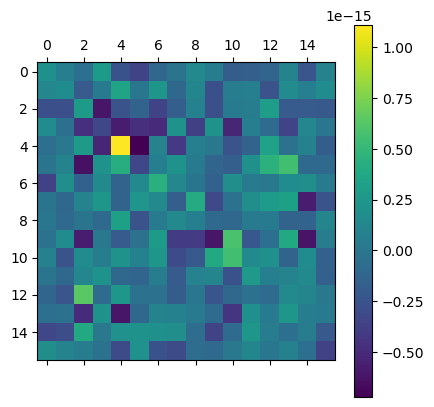

In [9]:
plt.matshow(diff.real)
plt.colorbar()

In [10]:
with np.printoptions(precision=3):
    print(original_gfuncsq.real)

[[0.111 0.055 0.084 0.108 0.096 0.078 0.054 0.074 0.047 0.076 0.092 0.066
  0.073 0.076 0.09  0.083]
 [0.052 0.125 0.116 0.106 0.087 0.087 0.069 0.102 0.062 0.083 0.133 0.07
  0.073 0.057 0.094 0.06 ]
 [0.073 0.12  0.315 0.154 0.162 0.162 0.082 0.126 0.09  0.114 0.241 0.094
  0.138 0.078 0.104 0.087]
 [0.103 0.113 0.155 0.298 0.168 0.16  0.098 0.145 0.113 0.093 0.126 0.112
  0.151 0.113 0.116 0.137]
 [0.1   0.095 0.184 0.175 0.319 0.14  0.092 0.111 0.089 0.122 0.233 0.09
  0.139 0.153 0.101 0.109]
 [0.075 0.093 0.168 0.163 0.137 0.19  0.08  0.126 0.077 0.104 0.139 0.102
  0.095 0.1   0.08  0.082]
 [0.054 0.072 0.082 0.098 0.087 0.08  0.096 0.077 0.049 0.079 0.089 0.059
  0.076 0.065 0.064 0.069]
 [0.069 0.106 0.125 0.142 0.102 0.122 0.078 0.192 0.072 0.092 0.128 0.07
  0.082 0.114 0.09  0.076]
 [0.048 0.065 0.091 0.115 0.085 0.077 0.05  0.075 0.076 0.064 0.104 0.055
  0.096 0.075 0.068 0.061]
 [0.075 0.083 0.113 0.097 0.119 0.108 0.085 0.094 0.066 0.19  0.185 0.085
  0.105 0.119 0.092 

In [11]:
np.sum(np.abs(original_gfuncsq - original_gfuncsq.T))

0.8850078613678836

In [12]:
L = 4

# # Create fake eigenvectors
# eigvecs = np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L)) \
#     + 1j*np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L))

# # Normalize each eigenvector
# for i in range(0, 2*L*L):
#     eigvecs[:, i] /= np.sqrt(np.sum(np.abs(eigvecs[:, i])**2))

# Load them once saved
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)

# print(eigvecs)

sigma = np.array([[1.1, 0.2], [-0.1, 0.6]])

# %timeit populate(L)
og_deg_gfuncsq = np.empty((L*L,L*L), dtype=complex)

for i in range(L*L):
    for j in range(L*L):
        og_deg_gfuncsq[i, j] = gfuncsq_deg_sigma(i, j, sigma, eigvecs, L)

opti_deg_gfuncsq = gfuncsq_mat_deg_sigma(sigma, eigvecs, L)

diff = opti_deg_gfuncsq - og_deg_gfuncsq
np.savetxt(f"../data/deg_sigma_gfuncsq_python_{L}x{L}.dat", og_deg_gfuncsq.real)
print(np.sum(np.abs(diff)))
print(np.max(np.abs(diff)))

6.010708424042388e-15
2.498001805406602e-16


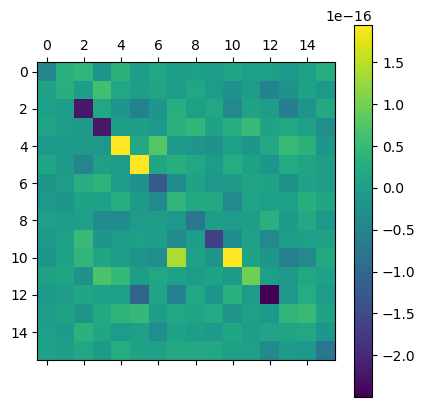

In [13]:
plt.matshow(diff.real)
plt.colorbar()

In [14]:
# L = 40

# # Create fake eigenvectors
# eigvecs = np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L)) \
#     + 1j*np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L))

# # Normalize each eigenvector
# for i in range(0, 2*L*L):
#     eigvecs[:, i] /= np.sqrt(np.sum(np.abs(eigvecs[:, i])**2))

# sigma = np.array([[1.1, 0.2], [-0.1, 0.6]])

#%timeit gfuncsq_mat_nondeg_sigma(sigma, eigvecs, L)

In [15]:
# L = 40

# # Create fake eigenvectors
# eigvecs = np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L)) \
#     + 1j*np.random.normal(loc=0, scale=1, size=(2*L*L, 2*L*L))

# # Normalize each eigenvector
# for i in range(0, 2*L*L):
#     eigvecs[:, i] /= np.sqrt(np.sum(np.abs(eigvecs[:, i])**2))

# sigma = np.array([[1.1, 0.2], [-0.1, 0.6]])

#%timeit gfuncsq_mat_deg_sigma(sigma, eigvecs, L)

## Different Definition
Let us do the same thing with the sigma as coefficient instead of full matrix

$G_\sigma(i,t;j,0) = \sum_{\alpha\beta} \sigma_{\alpha\beta} \langle i,\alpha| e^{-iHt} |j,\beta\rangle$

In [16]:
def gfuncsq_sigma_coeff_nondeg(i, j, sigma, eigvecs, L):
    Lsq = L*L
    elem = 0
    for alpha in range(2):
        for alpha_p in range(2):
            for beta in range(2):
                for beta_p in range(2):
                    for n in range(2*Lsq):
                        term1 = np.conj(sigma[alpha,beta]) * sigma[alpha_p, beta_p]
                        term2 = np.conj(eigvecs[2*i+alpha, n]) * eigvecs[2*i+alpha_p, n]
                        term3 = eigvecs[2*j+beta, n] * np.conj(eigvecs[2*j+beta_p, n])
                        elem += term1 * term2 * term3
    return elem

In [17]:
def gfuncsq_sigma_coeff_deg(i, j, sigma, eigvecs, L):
    Lsq = L*L
    elem = 0
    for alpha in range(2):
        for alpha_p in range(2):
            for beta in range(2):
                for beta_p in range(2):
                    for p in range(Lsq):
                        term1 = np.conj(sigma[alpha,beta]) * sigma[alpha_p, beta_p]
                        term2 = np.conj(eigvecs[2*i+alpha, 2*p]) * eigvecs[2*i+alpha_p, 2*p+1]
                        term3 = eigvecs[2*j+beta, 2*p] * np.conj(eigvecs[2*j+beta_p, 2*p+1])
                        elem += term1 * term2 * term3
                        term4 = np.conj(eigvecs[2*i+alpha, 2*p+1]) * eigvecs[2*i+alpha_p, 2*p]
                        term5 = eigvecs[2*j+beta, 2*p+1] * np.conj(eigvecs[2*j+beta_p, 2*p])
                        elem += term1 * term4 * term5
    return elem

In [18]:
def gfuncsq_sigma_mat_coeff_nondeg(sigma, eigvecs, L):
    Lsq = L*L
    matrix1 = np.empty((Lsq, 2*Lsq), dtype=complex)
    matrix2 = np.empty((Lsq, 2*Lsq), dtype=complex)
    gfuncsq = np.zeros((Lsq, Lsq), dtype=complex)
    
    for index1 in range(4):
        alpha = index1 // 2
        alpha_p = index1 % 2
        
        # Build matrix1
        for i in range(Lsq):
            for n in range(2*Lsq):
                matrix1[i,n] = np.conj(eigvecs[2*i+alpha,n]) * eigvecs[2*i+alpha_p,n]
        
        # Compute multiplication with self M_aa' @ M_aa'^H
        beta = alpha
        beta_p = alpha_p
        coeff = np.conj(sigma[alpha, beta]) * sigma[alpha_p, beta_p] 
        gfuncsq = gfuncsq + coeff * ( matrix1 @ matrix1.conj().T )

        for index2 in range(index1+1, 4):
            beta = index2 // 2
            beta_p = index2 % 2

            # Build matrix2
            for i in range(Lsq):
                for n in range(2*Lsq):
                    matrix2[i,n] = np.conj(eigvecs[2*i+beta,n]) * eigvecs[2*i+beta_p,n]

            # Compute M_aa' @ M_bb'^H
            coeff = np.conj(sigma[alpha, beta]) * sigma[alpha_p, beta_p] 
            gfuncsq = gfuncsq + coeff * ( matrix1 @ matrix2.conj().T )
            # Compute M_bb' @ M_aa'^H
            coeff = np.conj(sigma[beta, alpha]) * sigma[beta_p, alpha_p] 
            gfuncsq = gfuncsq + coeff * ( matrix2 @ matrix1.conj().T )
            
    return gfuncsq

In [19]:
def gfuncsq_sigma_mat_coeff_deg(sigma, eigvecs, L):
    Lsq = L*L
    matrix1 = np.empty((Lsq, Lsq), dtype=complex)
    matrix2 = np.empty((Lsq, Lsq), dtype=complex)
    gfuncsq = np.zeros((Lsq, Lsq), dtype=complex)
    
    for index1 in range(4):
        alpha = index1 // 2
        alpha_p = index1 % 2
        
        # Build matrix1
        for i in range(Lsq):
            for p in range(Lsq):
                matrix1[i,p] = np.conj(eigvecs[2*i+alpha,2*p]) * eigvecs[2*i+alpha_p,2*p+1]
        
        # Compute multiplication with self M_aa' @ M_aa'^H
        beta = alpha
        beta_p = alpha_p
        coeff = np.conj(sigma[alpha, beta]) * sigma[alpha_p, beta_p]
        gfuncsq = gfuncsq + 2 * ( coeff * matrix1 @ matrix1.conj().T ).real

        for index2 in range(index1+1, 4):
            beta = index2 // 2
            beta_p = index2 % 2

            # Build matrix2
            for i in range(Lsq):
                for p in range(Lsq):
                    matrix2[i,p] = np.conj(eigvecs[2*i+beta,2*p]) * eigvecs[2*i+beta_p,2*p+1]

            # Compute M_aa' @ M_bb'^H
            coeff = np.conj(sigma[alpha, beta]) * sigma[alpha_p, beta_p]
            gfuncsq = gfuncsq + 2 * (coeff * matrix1 @ matrix2.conj().T ).real
            # Compute M_bb' @ M_aa'^H
            coeff = np.conj(sigma[beta, alpha]) * sigma[beta_p, alpha_p]
            gfuncsq = gfuncsq + 2 * (coeff * matrix2 @ matrix1.conj().T ).real
            
    return gfuncsq

In [20]:
for index1 in range(4):
    alpha = index1 // 2
    alpha_p = index1 % 2

    # Compute multiplication with self
    print(f"Computing {2*alpha+alpha_p}x{2*alpha+alpha_p} a={alpha} a'={alpha_p} b={alpha} b'={alpha_p}")

    for index2 in range(index1+1, 4):
        beta = index2 // 2
        beta_p = index2 % 2
        # index1 = 2*alpha+alpha_p
        # index2 = 2*beta+beta_p
        print(f"Computing {index1}x{index2} a={alpha} a'={alpha_p} b={beta} b'={beta_p}")
        print(f"Computing {index2}x{index1} a={beta} a'={beta_p} b={alpha} b'={alpha_p}")

Computing 0x0 a=0 a'=0 b=0 b'=0
Computing 0x1 a=0 a'=0 b=0 b'=1
Computing 1x0 a=0 a'=1 b=0 b'=0
Computing 0x2 a=0 a'=0 b=1 b'=0
Computing 2x0 a=1 a'=0 b=0 b'=0
Computing 0x3 a=0 a'=0 b=1 b'=1
Computing 3x0 a=1 a'=1 b=0 b'=0
Computing 1x1 a=0 a'=1 b=0 b'=1
Computing 1x2 a=0 a'=1 b=1 b'=0
Computing 2x1 a=1 a'=0 b=0 b'=1
Computing 1x3 a=0 a'=1 b=1 b'=1
Computing 3x1 a=1 a'=1 b=0 b'=1
Computing 2x2 a=1 a'=0 b=1 b'=0
Computing 2x3 a=1 a'=0 b=1 b'=1
Computing 3x2 a=1 a'=1 b=1 b'=0
Computing 3x3 a=1 a'=1 b=1 b'=1


In [21]:
L = 4
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)
sigma = np.array([[1.1, 0.2], [-0.1, 0.6]])
og_nondeg_gfuncsq = np.empty((L*L,L*L), dtype=complex)

for i in range(L*L):
    for j in range(L*L):
        og_nondeg_gfuncsq[i, j] = gfuncsq_sigma_coeff_nondeg(i, j, sigma, eigvecs, L)

opti_nondeg_gfuncsq = gfuncsq_sigma_mat_coeff_nondeg(sigma, eigvecs, L)

diff = opti_nondeg_gfuncsq - og_nondeg_gfuncsq
np.savetxt(f"../data/nondeg_sigma_coeff_gfuncsq_python_{L}x{L}.dat", og_nondeg_gfuncsq.real)
print(np.sum(np.abs(diff)))
print(np.max(np.abs(diff)))

1.0533536475250995e-14
2.2205969260039947e-16


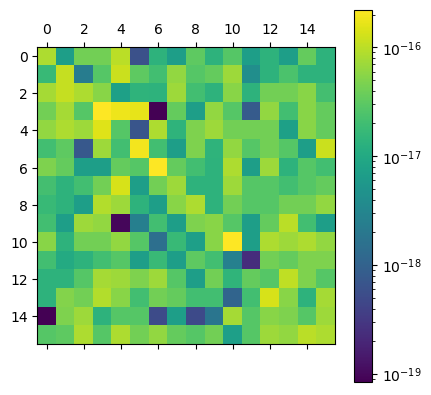

In [22]:
norm = mpl.colors.LogNorm(np.abs(diff).min(), np.abs(diff).max())
plt.matshow(np.abs(diff), norm=norm)
plt.colorbar()

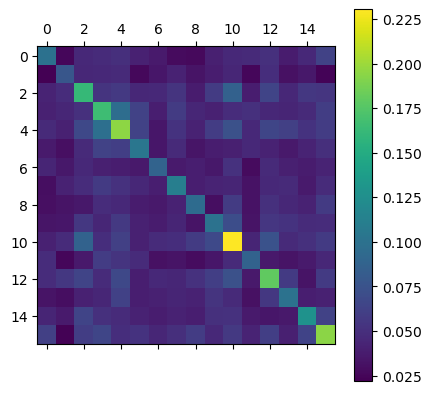

In [23]:
plt.matshow(opti_nondeg_gfuncsq.real)
plt.colorbar()

In [24]:
L = 4
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)
sigma = np.array([[1.1, 0.2], [-0.1, 0.6]])
og_nondeg_gfuncsq = np.empty((L*L,L*L), dtype=complex)

for i in range(L*L):
    for j in range(L*L):
        og_deg_gfuncsq[i, j] = gfuncsq_sigma_coeff_deg(i, j, sigma, eigvecs, L)

opti_deg_gfuncsq = gfuncsq_sigma_mat_coeff_deg(sigma, eigvecs, L)

diff = opti_deg_gfuncsq - og_deg_gfuncsq
np.savetxt(f"../data/deg_sigma_coeff_gfuncsq_python_{L}x{L}.dat", og_deg_gfuncsq.real)
print(np.sum(np.abs(diff)))
print(np.max(np.abs(diff)))

2.360098237070439e-15
1.1103124888755957e-16


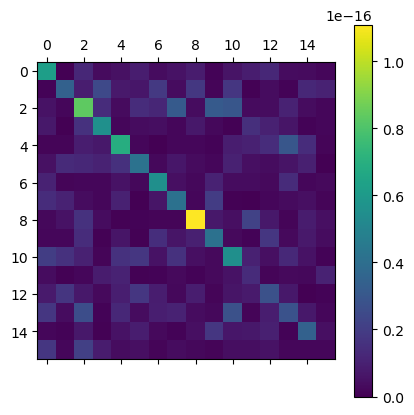

In [25]:
adiff = np.abs(diff)
norm = mpl.colors.Normalize(vmin=adiff.min(), vmax=adiff.max())
plt.matshow(adiff, norm=norm)
plt.colorbar()

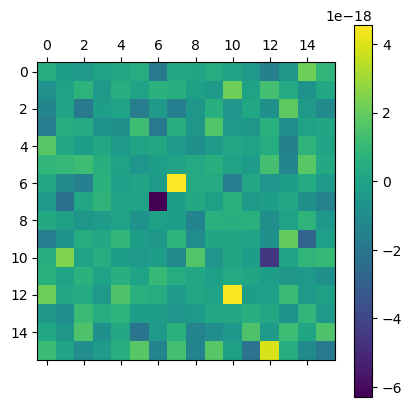

In [26]:
plt.matshow(og_deg_gfuncsq.imag)
plt.colorbar()

# Keldysh Green's Function

Ignore all that was done before. What we need are $\langle n_{\uparrow} \rangle$, $\langle n_{\downarrow} \rangle$, $\langle S^+ \rangle$, $\langle S^- \rangle$ at $t \to \infty$:

This requires $iG_K(i, \alpha, t; i, \beta, t) = \sum_{k,\gamma} G_R(i,\alpha,t;k,\gamma,0)G_R^*(i,\beta,t;k,\gamma,0)(1 - 2n_{k,\gamma}(0))$

In [3]:
def gfunc_gfuncstar_nondeg(i, alpha, beta, k, gamma, eigvecs, L):
    elem = 0 
    Lsq = L*L
    for n in range(2*Lsq):
        elem += eigvecs[2*i+alpha, n] * np.conj(eigvecs[2*i+beta, n]) * np.abs(eigvecs[2*k+gamma,n])**2    
    return elem

In [4]:
def gfunc_gfuncstar_nondeg_restr(i, alpha, beta, k, gamma, eigvecs, L, nmin, nmax):
    elem = 0
    Lsq = L*L
    for n in range(nmin, nmax):
        elem += eigvecs[2*i+alpha, n] * np.conj(eigvecs[2*i+beta, n]) * np.abs(eigvecs[2*k+gamma,n])**2    
    return elem

In [5]:
def gfunc_gfuncstar_deg(i, alpha, beta, k, gamma, eigvecs, L):
    elem = 0
    Lsq = L*L   
    for p in range(Lsq):
        term1 = eigvecs[2*i+alpha,2*p] * np.conj(eigvecs[2*i+beta,2*p+1])
        term2 = np.conj(eigvecs[2*k+gamma, 2*p+1]) * eigvecs[2*k+gamma,2*p]
        term3 = eigvecs[2*i+alpha,2*p+1] * np.conj(eigvecs[2*i+beta,2*p])
        term4 = np.conj(eigvecs[2*k+gamma, 2*p]) * eigvecs[2*k+gamma,2*p+1]
        elem += term1*term2 + term3*term4
    return elem

In [6]:
def gfunc_gfuncstar_deg_restr(i, alpha, beta, k, gamma, eigvecs, L, nmin, nmax):
    elem = 0
    Lsq = L*L
    pmin = nmin//2
    pmax = nmax//2
    for p in range(pmin, pmax):
        term1 = eigvecs[2*i+alpha,2*p] * np.conj(eigvecs[2*i+beta,2*p+1])
        term2 = np.conj(eigvecs[2*k+gamma, 2*p+1]) * eigvecs[2*k+gamma,2*p]
        term3 = eigvecs[2*i+alpha,2*p+1] * np.conj(eigvecs[2*i+beta,2*p])
        term4 = np.conj(eigvecs[2*k+gamma, 2*p]) * eigvecs[2*k+gamma,2*p+1]
        elem += term1*term2 + term3*term4
    return elem

In [7]:
def gfunc_gfuncstar_mat_nondeg(alpha, beta, eigvecs, L):
    Lsq = L*L
    # Create Z
    Z = np.abs(eigvecs)**2
    # Create A
    A = np.empty((Lsq,2*Lsq), dtype=complex)
    for i in range(Lsq):
        for n in range(2*Lsq):
            A[i,n] = eigvecs[2*i+alpha,n] * np.conj(eigvecs[2*i+beta, n])
    
    return A @ Z.T

In [8]:
def gfunc_gfuncstar_mat_deg(alpha, beta, gamma, eigvecs, L):
    Lsq = L*L
    C_ab = np.empty((Lsq,Lsq), dtype=complex)
    C_ba = np.empty((Lsq,Lsq), dtype=complex)
    C_gg = np.empty((Lsq,Lsq), dtype=complex)
    for i in range(Lsq):
        for p in range(Lsq):
            C_ab[i,p] = eigvecs[2*i+alpha,2*p] * np.conj(eigvecs[2*i+beta,2*p+1])
    for i in range(Lsq):
        for p in range(Lsq):
            C_ba[i,p] = eigvecs[2*i+beta,2*p] * np.conj(eigvecs[2*i+alpha,2*p+1])
    for i in range(Lsq):
        for p in range(Lsq):
            C_gg[i,p] = eigvecs[2*i+gamma,2*p] * np.conj(eigvecs[2*i+gamma,2*p+1])
    output = (C_ab @ C_gg.T) + np.conj(C_ba @ C_gg.T)
    gfuncsq = np.zeros((Lsq, 2*Lsq), dtype=complex)
    for i in range(Lsq):
        for k in range(Lsq):
            gfuncsq[i,2*k+gamma] = output[i,k]
    return gfuncsq

In [9]:
L = 4
alpha = 1
beta = 0
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)
direct_nondeg_gfuncsq = np.empty((L*L,2*L*L), dtype=complex)

for alpha in range(2):
    for beta in range(2):
        for i in range(L*L):
            for j in range(L*L):
                for gamma in range(2):
                    direct_nondeg_gfuncsq[i, 2*j+gamma] = gfunc_gfuncstar_nondeg(i, alpha, beta, j,
                                                                                 gamma, eigvecs, L)

        mat_nondeg_gfuncsq = gfunc_gfuncstar_mat_nondeg(alpha, beta, eigvecs, L)

        diff = direct_nondeg_gfuncsq - mat_nondeg_gfuncsq
        if alpha == beta:
            np.savetxt(f"../data/nondeg_gfunc_gfuncstar_a{alpha}_b{beta}_python_{L}x{L}.dat",
                       mat_nondeg_gfuncsq.real)
        else:
            np.savetxt(f"../data/nondeg_gfunc_gfuncstar_a{alpha}_b{beta}_python_{L}x{L}.dat",
                       mat_nondeg_gfuncsq)
            
        print(f"alpha: {alpha} beta: {beta}")
        print("Shape:", mat_nondeg_gfuncsq.shape)
        print(np.sum(np.abs(diff)))
        print(np.max(np.abs(diff)))
        print()

alpha: 0 beta: 0
Shape: (16, 32)
7.650130529057719e-16
1.3877787807814457e-17

alpha: 0 beta: 1
Shape: (16, 32)
4.2463893180868596e-16
5.204170427930421e-18

alpha: 1 beta: 0
Shape: (16, 32)
4.2463893180868596e-16
5.204170427930421e-18

alpha: 1 beta: 1
Shape: (16, 32)
9.08995101411847e-16
1.3877787807814457e-17



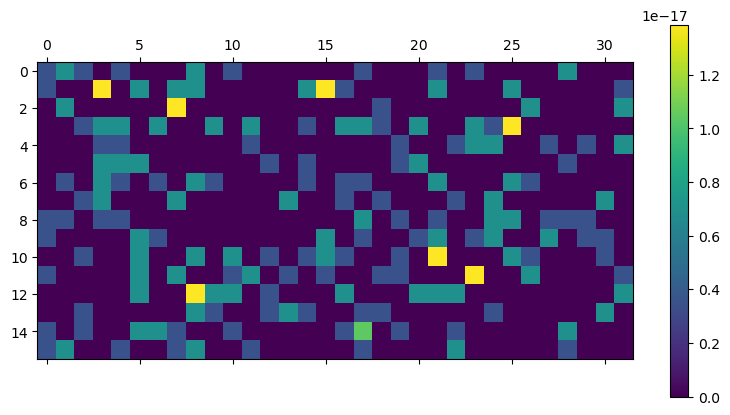

In [10]:
plt.matshow(np.abs(diff))
plt.colorbar()

In [11]:
z = np.abs(direct_nondeg_gfuncsq.imag)
print(f"Min: {z.min():e} Max: {z.max():e}")
norm = mpl.colors.LogNorm(vmin=z.min(), vmax=z.max())
plt.matshow(z, norm=norm)
plt.colorbar()

Min: 0.000000e+00 Max: 0.000000e+00


ValueError: Invalid vmin or vmax

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fcbd3b965f0> (for post_execute):


ValueError: vmin must be less or equal to vmax

ValueError: vmin must be less or equal to vmax

<Figure size 960x480 with 2 Axes>

In [12]:
def check_deg_gfuncsq(L, eigvecs, alpha, beta):
    direct_deg_gfuncsq = np.zeros((L*L,2*L*L), dtype=complex)
    mat_deg_gfuncsq = np.zeros((L*L,2*L*L), dtype=complex)
    for gamma in range(2):
        for i in range(L*L):
            for j in range(L*L):
                direct_deg_gfuncsq[i, 2*j+gamma] = gfunc_gfuncstar_deg(i, alpha, beta, j,
                                                                       gamma, eigvecs, L)

        addend = gfunc_gfuncstar_mat_deg(alpha, beta, gamma, eigvecs, L)
        mat_deg_gfuncsq += addend

    diff = direct_deg_gfuncsq - mat_deg_gfuncsq
    filename = f"../data/deg_gfunc_gfuncstar_a{alpha}_b{beta}_python_{L}x{L}.dat"
    if alpha == beta:
        np.savetxt(filename, mat_deg_gfuncsq.real)
    else:
        np.savetxt(filename, mat_deg_gfuncsq)
    print(f"α = {alpha} β = {beta} γ = {gamma}")
    print(f"Diff Sum = {np.sum(np.abs(diff)):.3e}")
    print(f"Diff Max = {np.max(np.abs(diff)):.3e}")
    return direct_deg_gfuncsq, mat_deg_gfuncsq

In [13]:
def write_gfuncsq_deg_restr(L, eigvecs, alpha, beta, nmin, nmax):
    direct_deg_gfuncsq = np.zeros((L*L,2*L*L), dtype=complex)
    for gamma in range(2):
        for i in range(L*L):
            for j in range(L*L):
                direct_deg_gfuncsq[i, 2*j+gamma] = gfunc_gfuncstar_deg_restr(i, alpha, beta, j,
                                                                            gamma, eigvecs, L,
                                                                             nmin, nmax)
    filename = f"../data/deg_gfunc_gfuncstar_restr_a{alpha}_b{beta}_min{nmin}_max{nmax}_python_{L}x{L}.dat"
    if alpha == beta:
        np.savetxt(filename, direct_deg_gfuncsq.real)
    else:
        np.savetxt(filename, direct_deg_gfuncsq)


In [14]:
def write_gfuncsq_nondeg_restr(L, eigvecs, alpha, beta, nmin, nmax):
    direct_nondeg_gfuncsq = np.zeros((L*L,2*L*L), dtype=complex)
    for gamma in range(2):
        for i in range(L*L):
            for j in range(L*L):
                direct_nondeg_gfuncsq[i, 2*j+gamma] = gfunc_gfuncstar_nondeg_restr(i, alpha, beta, j, gamma,
                                                                          eigvecs, L, nmin, nmax)
    filename = f"../data/nondeg_gfunc_gfuncstar_restr_a{alpha}_b{beta}_min{nmin}_max{nmax}_python_{L}x{L}.dat"
    if alpha == beta:
        np.savetxt(filename, direct_nondeg_gfuncsq.real)
    else:
        np.savetxt(filename, direct_nondeg_gfuncsq)


In [15]:
L = 4
alpha = 0
beta = 0
gamma = 0
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)

for alpha in range(2):
    for beta in range(2):
        check_deg_gfuncsq(L, eigvecs, alpha, beta)
        print()


α = 0 β = 0 γ = 1
Diff Sum = 4.205e-16
Diff Max = 1.041e-17

α = 0 β = 1 γ = 1
Diff Sum = 4.868e-16
Diff Max = 5.222e-18

α = 1 β = 0 γ = 1
Diff Sum = 4.868e-16
Diff Max = 5.222e-18

α = 1 β = 1 γ = 1
Diff Sum = 4.601e-16
Diff Max = 1.041e-17



α = 0 β = 1 γ = 1
Diff Sum = 4.868e-16
Diff Max = 5.222e-18
Min: -1.520e-02 Max: 1.290e-02
Min: -1.520e-02 Max: 1.290e-02


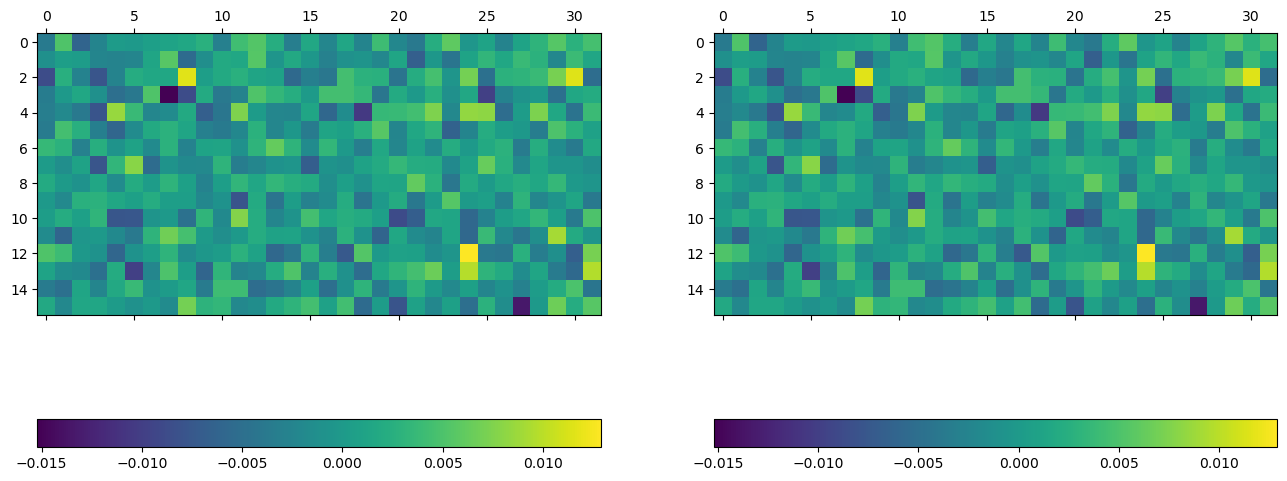

In [16]:
direct_deg_gfuncsq, mat_deg_gfuncsq = check_deg_gfuncsq(L, eigvecs, alpha=0, beta=1)
fig, axes = plt.subplots(ncols=2, figsize=(16, 9))
ax = axes[0]
z = direct_deg_gfuncsq.imag
print(f"Min: {z.min():.3e} Max: {z.max():.3e}")
# norm = mpl.colors.LogNorm(vmin=z.min(), vmax=z.max())
norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())
mappable = ax.matshow(z, norm=norm)
plt.colorbar(mappable, ax=ax, location="bottom", orientation="horizontal")

ax = axes[1]
z = mat_deg_gfuncsq.imag
print(f"Min: {z.min():.3e} Max: {z.max():.3e}")
# norm = mpl.colors.LogNorm(vmin=z.min(), vmax=z.max())
norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())
mappable = ax.matshow(z, norm=norm)
plt.colorbar(mappable, ax=ax, location="bottom", orientation="horizontal")

In [17]:
L = 4
nmin = 8
nmax = 16
eigvecs = np.loadtxt(f"../data/fake_eigenvectors_{L}x{L}.dat", dtype=complex)

for alpha in range(2):
    for beta in range(2):
        write_gfuncsq_nondeg_restr(L, eigvecs, alpha, beta, nmin, nmax)
        write_gfuncsq_deg_restr(L, eigvecs, alpha, beta, nmin, nmax)